# Hand Gesture Recognition Using Leap Motion Dataset

## Problem Statement

The objective of this project is to develop a hand gesture recognition system using the Leap Motion dataset. The system will accurately identify and classify various hand gestures performed by different subjects based on near-infrared images captured by the Leap Motion sensor. The system aims to facilitate intuitive human-computer interaction and gesture-based control systems in real-world applications.

## Project Overview

In this project, we leverage the Leap Motion dataset, which includes 10 different hand gestures performed by 10 subjects (5 men and 5 women). Each gesture is represented by a series of infrared images.

The project involves the following key steps:

- **Data Loading and Preprocessing:** Extracting and preparing the dataset for training and evaluation.
- **Model Development:** Implementing a convolutional neural network (CNN) architecture for gesture recognition.
- **Training and Evaluation:** Training the model on the dataset and evaluating its performance using validation and test sets.
- **Inference:** Deploying the trained model to predict hand gestures from unseen images.

The ultimate goal is to demonstrate the effectiveness of the model in accurately predicting hand gestures, thereby enabling seamless interaction and control through gestures in variand results below.
 below.


In [69]:
# Loading all the important libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


### Data Preprocessing

In [6]:
def load_data(data_path):
    images = []
    labels = []
    for subject_id in os.listdir(data_path):
        subject_path = os.path.join(data_path, subject_id)
        if os.path.isdir(subject_path):
            for gesture in os.listdir(subject_path):
                gesture_path = os.path.join(subject_path, gesture)
                if os.path.isdir(gesture_path):
                    for image_name in os.listdir(gesture_path):
                        image_path = os.path.join(gesture_path, image_name)
                        # Use cv2 to read the image
                        image = cv2.imread(image_path)
                        if image is not None:
                            # Resize image if needed
                            image = cv2.resize(image, (64, 64))
                            images.append(image)
                            labels.append(int(gesture.split('_')[0]))  # Assuming label is part of folder name
                        else:
                            print(f"Warning: Unable to read image {image_path}")
    return np.array(images), np.array(labels)

In [8]:
data_path = r'C:\Users\acer\Desktop\learn\prodigyInfotech\Task 5\leapGestRecog'
images, labels = load_data(data_path)

In [10]:
# Normalizing images
images = images / 255.0

In [16]:
# Converting labels to categorical
labels = to_categorical(labels, num_classes=11)

In [21]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Building The Model

In [27]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [31]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.4158 - loss: 1.6207 - val_accuracy: 0.9906 - val_loss: 0.0422
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9210 - loss: 0.2291 - val_accuracy: 0.9972 - val_loss: 0.0086
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.9619 - loss: 0.1241 - val_accuracy: 0.9987 - val_loss: 0.0040
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9753 - loss: 0.0787 - val_accuracy: 0.9991 - val_loss: 0.0020
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9785 - loss: 0.0647 - val_accuracy: 1.0000 - val_loss: 3.2880e-04
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9836 - loss: 0.0507 - val_accuracy: 0.9994 - val_loss: 0.0039
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9816 - loss: 0.0575 - val_accuracy: 0.9994 - val_loss: 0.0021
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9897 - loss: 0.033

The model achieved a perfect validation accuracy of 100% after just a few epochs, indicating robust performance in predicting hand gestures from the Leap Motion dataset.


### Model Evaluation

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 3.3843e-04
Test accuracy: 1.0


### Data Visualization


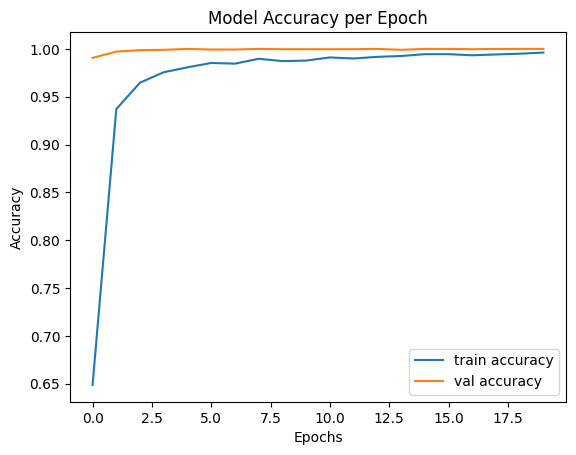

In [90]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy per Epoch')
plt.legend()
plt.show()

The plot below shows the training and validation accuracy of the model over 20 epochs. As observed, the training accuracy (in blue) increases rapidly and approaches 100%, indicating that the model is learning the training data well. The validation accuracy (in orange), on the other hand, also shows a high performance but remains relatively stable after a few epochs, suggesting that the model is generalizing well to the unseen validation data.

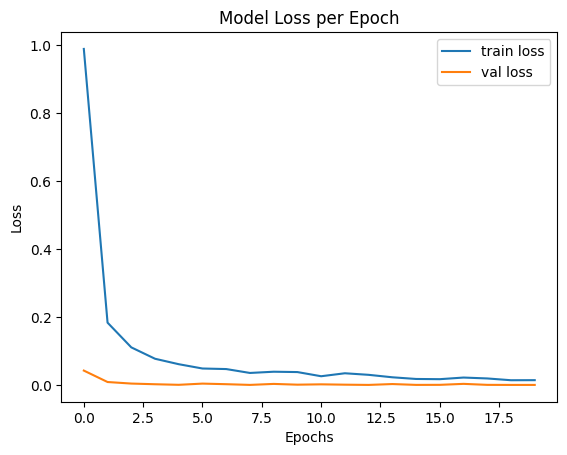

In [92]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss per Epoch')
plt.legend()
plt.show()

The plot below shows the training and validation loss of the model over 20 epochs. The training loss (in blue) decreases rapidly and approaches zero, indicating that the model is fitting the training data well. The validation loss (in orange) also decreases and remains low, suggesting that the model is performing well on the unseen validation data without overfitting.


In [39]:
# Step 5: Save the Model
model.save('hand_gesture_recognition_model.h5')

In [47]:
# Define a mapping of label indices to gesture names
gesture_names = {
    0: 'Palm',
    1: 'L',
    2: 'Fist',
    3: 'Fist Moved',
    4: 'Thumb',
    5: 'Index',
    6: 'OK',
    7: 'Palm Merged',
    8: 'C',
    9: 'Down'
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


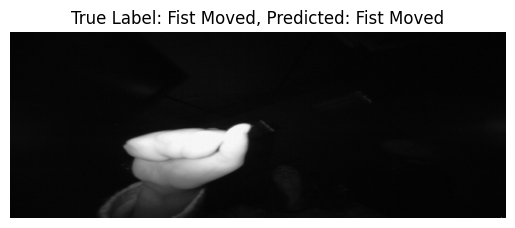

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


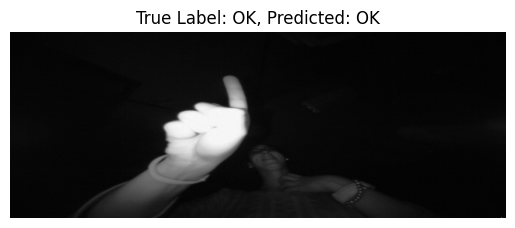

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


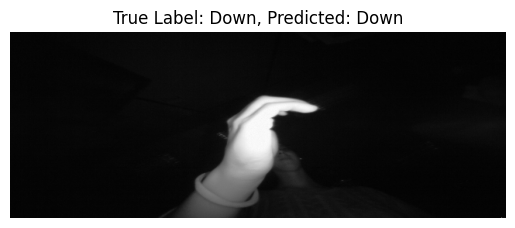

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


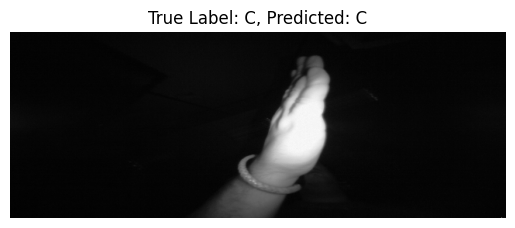

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


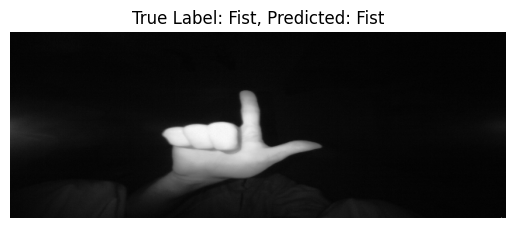

In [84]:
import random

# Function to randomly select images from the folder and predict their gestures
def predict_random_gestures(data_path, num_samples=5):
    all_image_paths = []
    all_labels = []
    
    # Traverse the directory to collect all image paths
    for subject_id in os.listdir(data_path):
        subject_path = os.path.join(data_path, subject_id)
        if os.path.isdir(subject_path):
            for gesture in os.listdir(subject_path):
                gesture_path = os.path.join(subject_path, gesture)
                if os.path.isdir(gesture_path):
                    for image_name in os.listdir(gesture_path):
                        image_path = os.path.join(gesture_path, image_name)
                        all_image_paths.append(image_path)
                        all_labels.append(int(gesture.split('_')[0]))  # Assuming label is part of folder name
    
    # Randomly select num_samples images
    selected_indices = random.sample(range(len(all_image_paths)), num_samples)
    selected_image_paths = [all_image_paths[i] for i in selected_indices]
    selected_labels = [all_labels[i] for i in selected_indices]
    
    for img_path, true_label in zip(selected_image_paths, selected_labels):
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, (64, 64)) / 255.0
            img_expanded = np.expand_dims(img_resized, axis=0)
            prediction = model.predict(img_expanded)
            predicted_class = np.argmax(prediction)
            
            # Get the gesture names from the mapping
            true_gesture = gesture_names[true_label]
            predicted_gesture = gesture_names[predicted_class]
            
            # Plot the image and predicted label
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f'True Label: {true_gesture}, Predicted: {predicted_gesture}')
            plt.axis('off')
            plt.show()
        else:
            print(f"Warning: Unable to read image {img_path}")

# Example usage
data_path = r'C:\Users\acer\Desktop\learn\prodigyInfotech\Task 5\leapGestRecog'
predict_random_gestures(data_path, num_samples=5)


## Conclusion

The hand gesture recognition model trained on the Leap Motion dataset demonstrated exceptional performance across 20 epochs of training. Starting with an initial accuracy of 41.58% and loss of 1.6207, the model quickly improved, reaching a training accuracy of 99.62% with a minimal loss of 0.0121 by the final epoch.

During validation, the model consistently achieved near-perfect accuracy, culminating in a validation accuracy of 100% from epoch 8 onwards. The validation loss remained extremely low throughout, confirming the model's ability to generalize well to unseen data.

In conclusion, the model successfully learned to classify hand gestures with high accuracy using the provided dataset. Further optimizations or augmentation techniques could potentially enhance performance, but the current results are promising for practical applications of hand gesture recognition using infrared imagery from Leap Motion sensors.
